<figure>
  <IMG SRC="img/logo_ufaz.png" WIDTH=100 ALIGN="right">
</figure>

# Lab 5 : Filtering
*Signal Processing in Geosciences / C. Jodry / Oct. 2020* 

---------

In [6]:
import numpy as np
import math
from scipy import signal
from numpy import fft
import matplotlib.pyplot as plt
% matplotlib inline
from IPython.display import Audio, display

## 1. RC circuit as a filter

Let us consider the following RC circuit
<figure>
  <IMG SRC="img/RC_circuit.png" WIDTH=200 ALIGN="center">
</figure>

As currents flows, it generates a AC voltage source ($V_{in}$) in the circuit composed of a resistor ($R$) and a capacitor ($C$). A capacitor is a passive electronic component that stores electrical energy in a electric field. Thus, as the capacitor charges up, it builds a voltage ($V_{out}$).

According to Kirchhoff's voltage law, $V_{out} = \frac{q(t)}{C}$ with $q(t)$ being the charge of the capacitor. It leads to the differential equation : $ V_{out}+ RC\frac{dV_{out}}{dt} = V_{in}$

The Fourier transform of this differential equation is : $2j \pi fRCV_{out}(\omega) + V_{out}(\omega) = V_{in}(\omega)$

> To do :
* Consider a RC circuit with a resistor of 47k$\Omega$ in series with a capacitor of 47nF. 
* Write the transfert function of the RC circuit. Then draw the corresponding Bode diagram (amplitude and phase) using `plt.semilogx`.
* Give the order n of this filter and its coefficient b and a.
* Calculate the exact cut-off frequency as $fc =  \frac{1}{2\pi RC} $. Place it on the amplitude Bode diagram.
* Define what kind of filter can be associated to the RC circuit ? Define the interval frequency for the pass-band.

In [7]:
# RC circuit parameters
C = 47E-9
R = 47000
f = np.arange(1,10000,1)

# transfer function

H_w = 1/(1+2j*np.pi*R*C*f)

Text(0.5,1,'Bode Diagram phase Response')

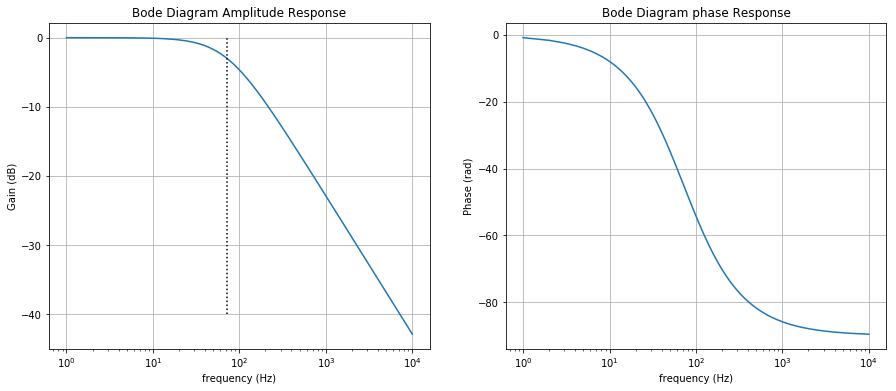

In [9]:
# plot Bode diagram

dB_mag = 20*np.log10(np.abs(H_w))
phase=np.arctan2(np.imag(H_w),np.real(H_w))*180/np.pi

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.semilogx(f,dB_mag)
plt.xlabel('frequency (Hz)')
plt.ylabel('Gain (dB)')
plt.plot([72,72],[-40,0],'k:')
plt.grid()
plt.title('Bode Diagram Amplitude Response')

plt.subplot(122)
plt.semilogx(f,phase)
plt.xlabel('frequency (Hz)')
plt.ylabel('Phase (rad)')
plt.grid()
plt.title('Bode Diagram phase Response')

Order of the filter: $n=1$ (diff eq of the 1st order)

The coefficients are given by $H_w$ with $b$ numerator and $a$ denominator. Coefficient order strats with the highest power of the variable (here $\omega$):

$H_\omega = \frac{V_{out}(\omega)}{V_{in}(\omega)} = \frac{1}{jRC\omega}$

$b = [0,1]$
$a = [jRC,1]$ 

In [10]:
# the cut-off frequency
fc=1/(2*np.pi*R*C)
print(fc)

72.04841244540305


# 2. Applying a butterworth filter

We will now one of the most popular filter in signal processing : The butterworth filter.

It requires to use 2 functions : 
* `signal.butter` to compute the $b$ and $a$ parameters (coefficients of the polynomial in $i \omega$ for the numerator and denominator) of the desired filter
* `signal.lfilter` to apply this filter to the dataseries (in the time domain)

## 2.1 Analysis of a seismogram

The file `mayotte_1hour.txt` contains 1 hour of raw seismic signal recorded by a seismometer on the island of Mayotte.
It is a text file but with few *meta-data* information at the beginning including the time step.

> To do :
* Import this timeseries with `np.loadtxt` using the `skiprows` option of this function
* Plot the timeseries
* Compute it's Fourier transform and plot the amplitude spectrum (with a log-log scale)
* Make a quick analysis of this spectrogram

In [11]:
# load data
sismo = np.loadtxt('Data/mayotte_1hour.txt',skiprows=8)
sismo = sismo-np.mean(sismo)

# Define parameters
dt = 0.02 # The time step (indicated in the data file)
N = len(sismo) # Number of points
t = np.arange(0,N)*dt # The time vector/sequence

# Fourier transform
S = fft.fft(sismo) # The Fourier transform
f = fft.fftfreq(N,dt) # The corresponding frequency vector

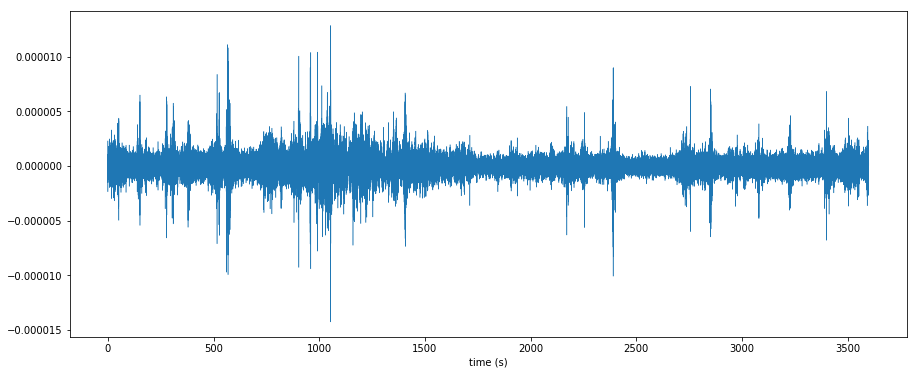

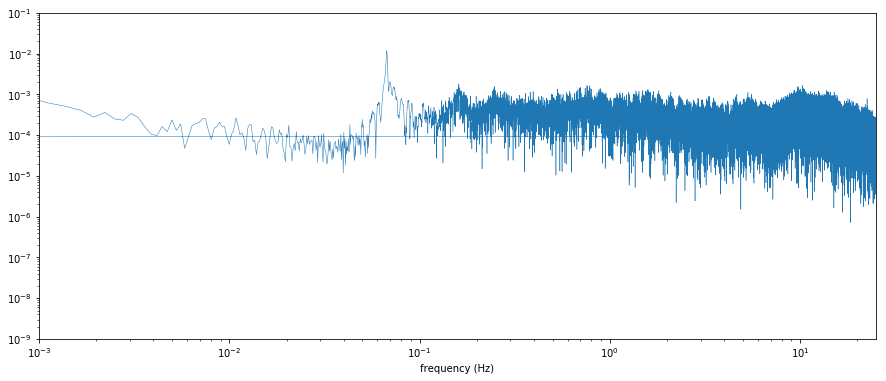

In [12]:
# Plotting
plt.figure(figsize=(15,6))
plt.plot(t,sismo,linewidth=0.5)
plt.xlabel('time (s)')


plt.figure(figsize=(15,6))
plt.plot(f,np.abs(S),linewidth=0.5)
#plt.semilogx(f,np.abs(S),linewidth=0.5)
plt.xlim((0.001,1./(2*dt)))
plt.ylim(10**-9,10**-1)
plt.xlabel('frequency (Hz)')
plt.xscale('log')
plt.yscale('log')

## 2.2 Filter the data

Before, have a look to the help of the `signal.butter` and `signal.lfilter` functions. 

> To do :
* Create the $b$ and $a$ vector for a low-pass filter at $0.1Hz$ (and order $2$) to be applied do your timeseries
* Use the function `signal.freqz` to plot the amplitude and phase spectrum of this filter
* Apply this filter to your timeseries with `signal.lfilter`
* Plot the timeseries
* Compute it's Fourier transform and plot the amplitude spectrum (with a log-log scale)
* Make a quick analysis of this spectrogram

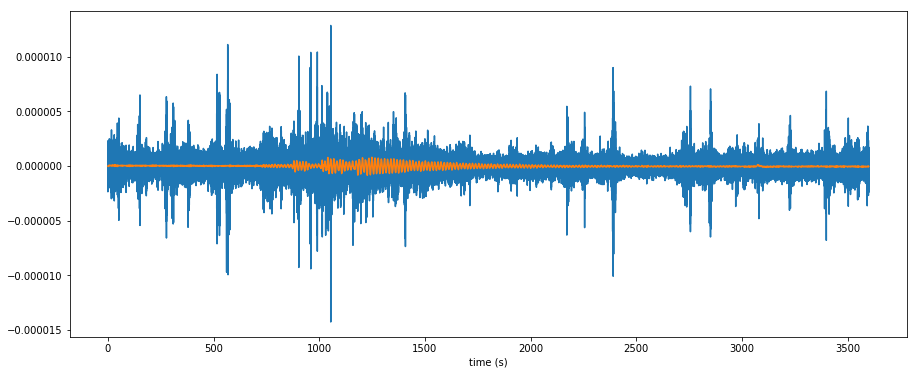

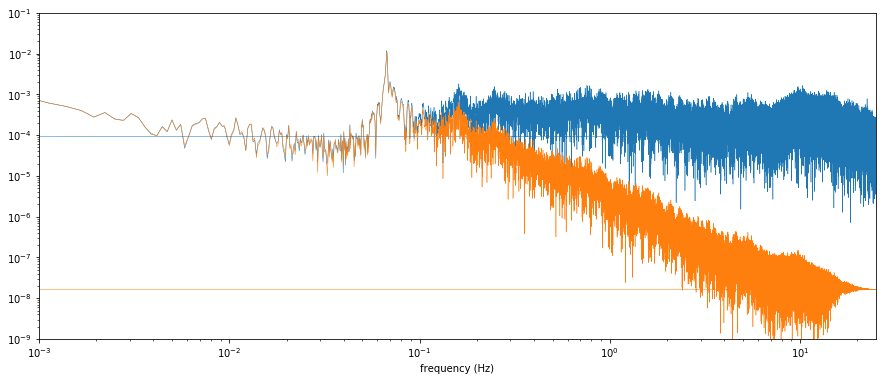

In [13]:
# Creating the filter
order = 2
cutoff_freq = 0.1 # cut-off frequency of the low-pass filter in Hz
nyquist_frequency = 1/(2*dt) # Nyquist frequency = sampling frequency / 2

b, a = signal.butter(order,cutoff_freq/nyquist_frequency,btype='low')
# For digital filters, Wn are in the same units as fs. By default, fs is 2 half-cycles/sample,
# so these are normalized from 0 to 1, where 1 is the Nyquist frequency. (Wn is thus in half-cycles / sample.)
# See signal.butter for more information

# Filter data
sismo_filtered = signal.lfilter(b,a,sismo)

# Fourier transform
S_LP = fft.fft(sismo_filtered) # The Fourier transform

# Plot filtered data
plt.figure(figsize=(15,6))
plt.plot(t,sismo)
plt.plot(t,sismo_filtered)
plt.xlabel('time (s)')

plt.figure(figsize=(15,6))
plt.plot(f,np.abs(S),linewidth=0.5)
plt.plot(f,np.abs(S_LP),linewidth=0.5)
#plt.semilogx(f,np.abs(S),linewidth=0.5)
plt.xlim((0.001,1./(2*dt)))
plt.ylim(10**-9,10**-1)
plt.xlabel('frequency (Hz)')
plt.xscale('log')
plt.yscale('log')

We now want to apply a high filter at $10Hz$

> To do :
* Define your $a$ and $b$ coefficient for this new filter
* Apply it to your timeseries
* Plot the timeseries
* Compute it's Fourier transform and plot the amplitude spectrum (with a log-log scale)
* Make a quick analysis of this spectrogram

In [17]:
# creation of the filter
order = 2
Filter_type = 'high'
cutoff_freq = 10

b, a = signal.butter(2,cutoff_freq/nyquist_frequency,btype = Filter_type)

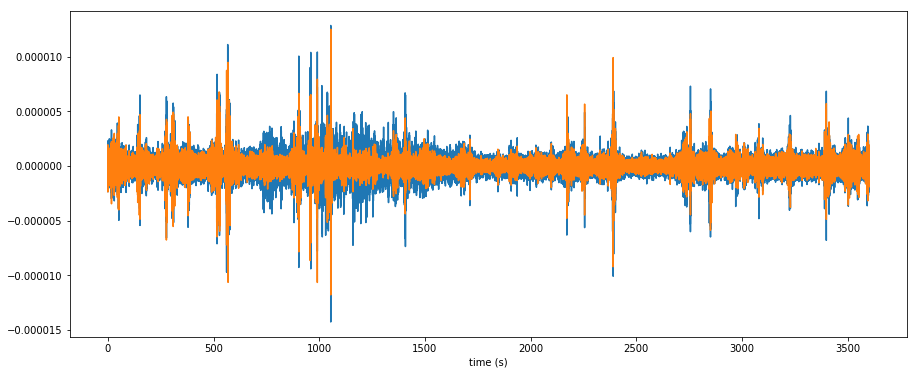

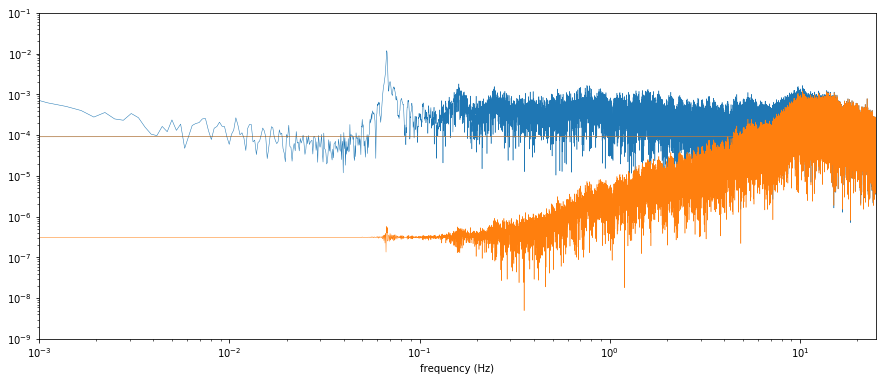

In [18]:
# Filter data
sismo_filtered = signal.lfilter(b,a,sismo)

# Fourier transform
S_HP = fft.fft(sismo_filtered) # The Fourier transform

# Plot filtered data
plt.figure(figsize=(15,6))
plt.plot(t,sismo)
plt.plot(t,sismo_filtered)
plt.xlabel('time (s)')

plt.figure(figsize=(15,6))
plt.plot(f,np.abs(S),linewidth=0.5)
plt.plot(f,np.abs(S_HP),linewidth=0.5)
#plt.semilogx(f,np.abs(S),linewidth=0.5)
plt.xlim((0.001,1./(2*dt)))
plt.ylim(10**-9,10**-1)
plt.xlabel('frequency (Hz)')
plt.xscale('log')
plt.yscale('log')

We now want to apply a bandpass filter between $1Hz$ and $3Hz$

> To do :
* Define your $a$ and $b$ coefficient for this new filter
* Apply it to your timeseries
* Plot the timeseries
* Compute it's Fourier transform and plot the amplitude spectrum (with a log-log scale)
* Make a quick analysis of this spectrogram

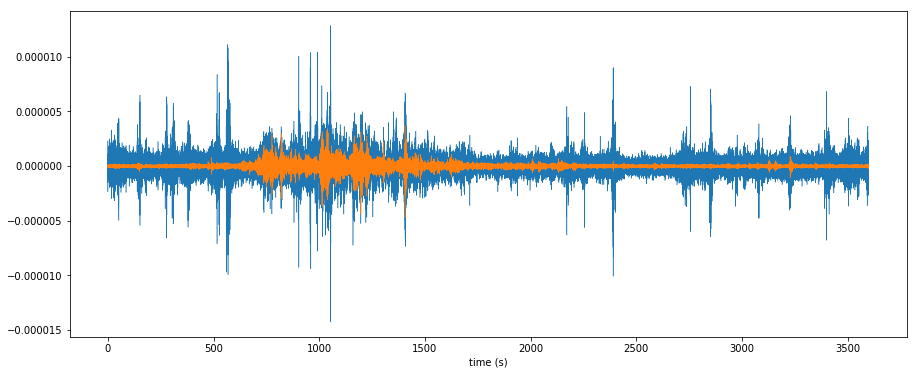

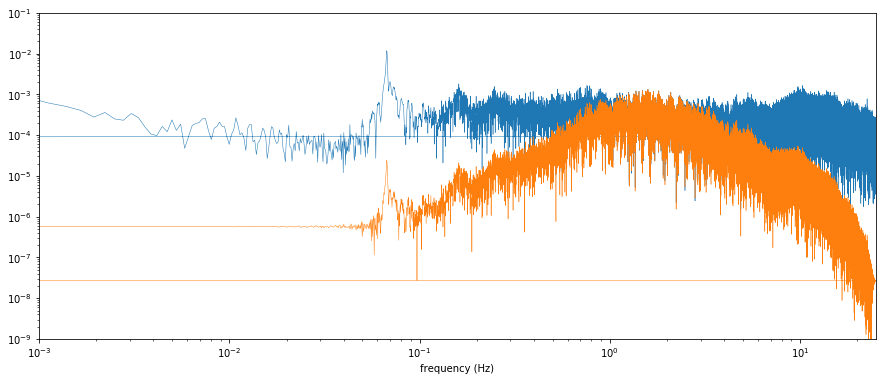

In [15]:
# Creating the filter
fmin = 1 # cutoff freq1
fmax = 3 # cutoff freq2
b,a = signal.butter(2,[fmin/nyquist_frequency,fmax/nyquist_frequency],btype="bandpass")

# Filter data
sismo_filtered = signal.lfilter(b, a, sismo)

# Fourier transform
S_BP = fft.fft(sismo_filtered) # The Fourier transform

plt.figure(figsize=(15,6))
plt.plot(t,sismo,linewidth=0.5)
plt.plot(t,sismo_filtered,linewidth=0.5)
plt.xlabel('time (s)')

plt.figure(figsize=(15,6))
plt.plot(f,np.abs(S),linewidth=0.5)
plt.plot(f,np.abs(S_BP),linewidth=0.5)
#plt.semilogx(f,np.abs(S),linewidth=0.5)
plt.xlim((0.001,1./(2*dt)))
plt.ylim(10**-9,10**-1)
plt.xlabel('frequency (Hz)')
plt.xscale('log')
plt.yscale('log')